#Week 5: Geospaal and Locaon-Based Analysis:-  



# >Visualize accident hotspots using latitude and longitude.

To visualize accident hotspots using latitude and longitude, you can use Python with libraries like Folium, Matplotlib, or Plotly. Folium is best for interactive maps where you can zoom, pan, and hover over points.




#Using Folium:

In [4]:
import pandas as pd
import folium
from folium.plugins import HeatMap
data = {
    'Latitude': [40.748817, 40.748941, 40.749641, 40.749841, 40.748600],
    'Longitude': [-73.985428, -73.986500, -73.987200, -73.985900, -73.984700]
}
df = pd.DataFrame(data)
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=15)
HeatMap(data=df[['Latitude', 'Longitude']].values, radius=15).add_to(m)
m.save("accident_hotspots.html")


# Using Matplotlib Scatter Plot:

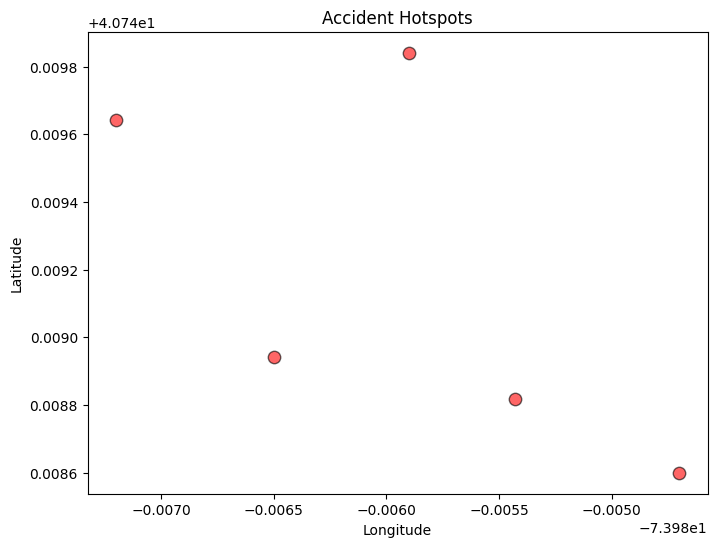

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['Longitude'], df['Latitude'], c='red', alpha=0.6, s=80, edgecolors='black')
plt.title("Accident Hotspots")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


#Create scatter plots or density maps for different states/cities:

#✅ 1. Scatter Plot by City/State:

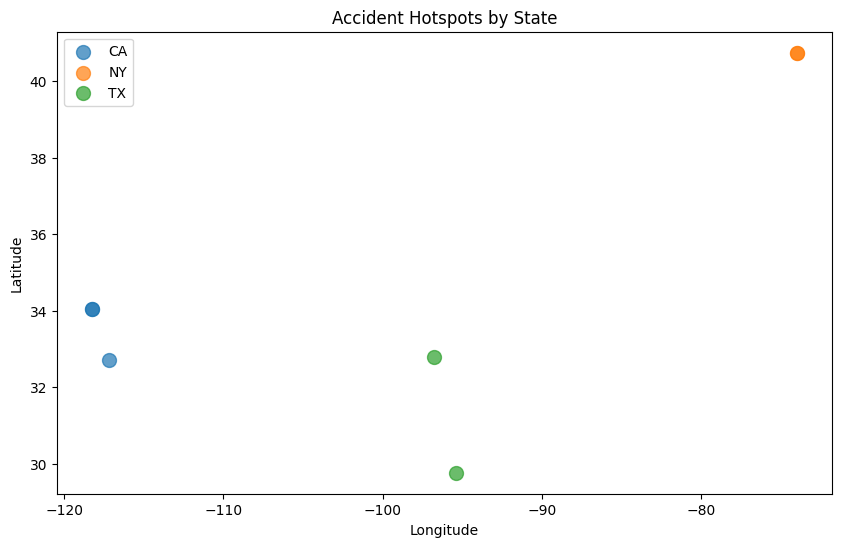

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
data = {
    'State': ['NY', 'NY', 'CA', 'CA', 'CA', 'TX', 'TX'],
    'City': ['New York', 'New York', 'Los Angeles', 'Los Angeles', 'San Diego', 'Houston', 'Dallas'],
    'Latitude': [40.748817, 40.749641, 34.052235, 34.052500, 32.715736, 29.760427, 32.776665],
    'Longitude': [-73.985428, -73.987200, -118.243683, -118.244000, -117.161087, -95.369804, -96.796989]
}
df = pd.DataFrame(data)
plt.figure(figsize=(10,6))
for state, group in df.groupby("State"):
    plt.scatter(group["Longitude"], group["Latitude"], label=state, s=100, alpha=0.7)

plt.title("Accident Hotspots by State")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()


#✅ 2. Density Map with Seaborn (KDE Plot):

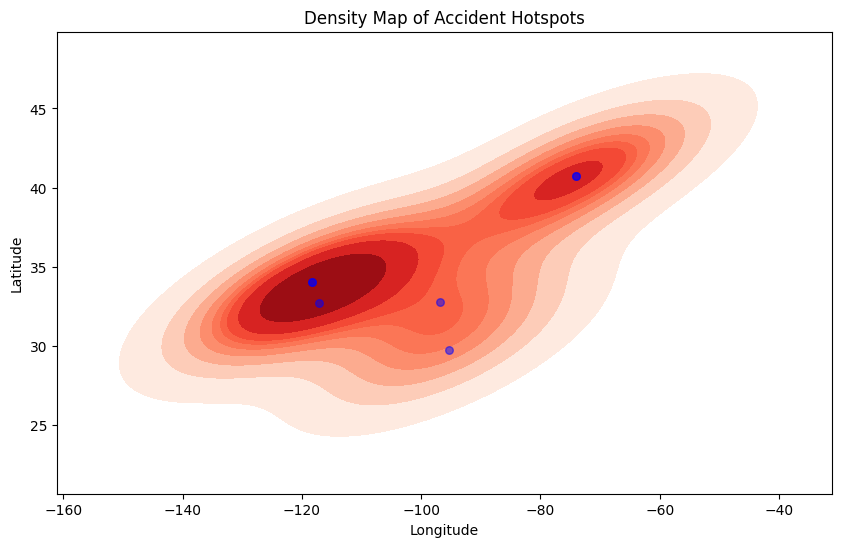

In [7]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="Longitude", y="Latitude", fill=True, cmap="Reds", thresh=0.05)
plt.scatter(df["Longitude"], df["Latitude"], c="blue", s=30, alpha=0.5)
plt.title("Density Map of Accident Hotspots")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


#✅ 3. Interactive Density Map with Folium (by City):

In [14]:
import folium
from folium.plugins import HeatMap
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
HeatMap(df[['Latitude','Longitude']], radius=12).add_to(m)
m.save("accident_density_map.html")


#Highlight top 5 most accident-prone states or cities.  

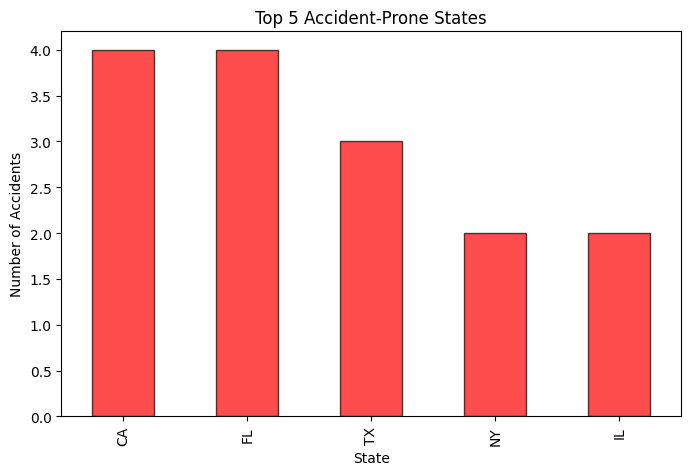

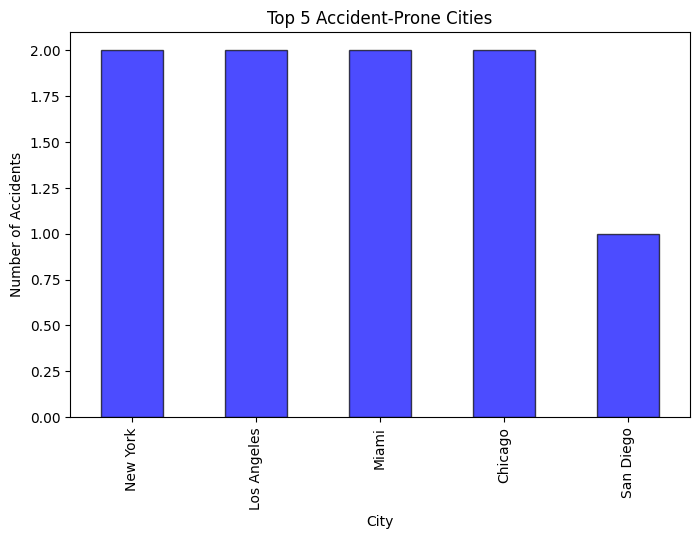

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
data = {
    'State': ['NY','NY','CA','CA','CA','CA','TX','TX','TX','IL','IL','FL','FL','FL','FL'],
    'City': ['New York','New York','Los Angeles','Los Angeles','San Diego','San Francisco',
             'Houston','Dallas','Austin','Chicago','Chicago','Miami','Orlando','Tampa','Miami'],
    'Latitude': [40.748817,40.749641,34.052235,34.052500,32.715736,37.774929,
                 29.760427,32.776665,30.267153,41.878113,41.881832,25.761681,28.538336,27.950575,25.774172],
    'Longitude': [-73.985428,-73.987200,-118.243683,-118.244000,-117.161087,-122.419418,
                  -95.369804,-96.796989,-97.743057,-87.629799,-87.623177,-80.191788,-81.379234,-82.457178,-80.19362]
}
df = pd.DataFrame(data)
state_counts = df['State'].value_counts().head(5)
city_counts = df['City'].value_counts().head(5)
plt.figure(figsize=(8,5))
state_counts.plot(kind='bar', color='red', alpha=0.7, edgecolor='black')
plt.title("Top 5 Accident-Prone States")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.show()
plt.figure(figsize=(8,5))
city_counts.plot(kind='bar', color='blue', alpha=0.7, edgecolor='black')
plt.title("Top 5 Accident-Prone Cities")
plt.xlabel("City")
plt.ylabel("Number of Accidents")
plt.show()


#✅Highlight Top 5 on a Map (Folium):

In [13]:
import folium
top_cities = df['City'].value_counts().head(5).index
top_df = df[df['City'].isin(top_cities)]
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
for _, row in top_df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=8,
        color="red",
        fill=True,
        fill_color="red",
        popup=f"{row['City']} ({row['State']})"
    ).add_to(m)

m.save("top5_accident_cities.html")


# **Week 6: Insight Extracon and Hypothesis Tesng:- **

#What time of day has the most accidents?.

#✅ 1. Extract Hour from Accident Timestamp:

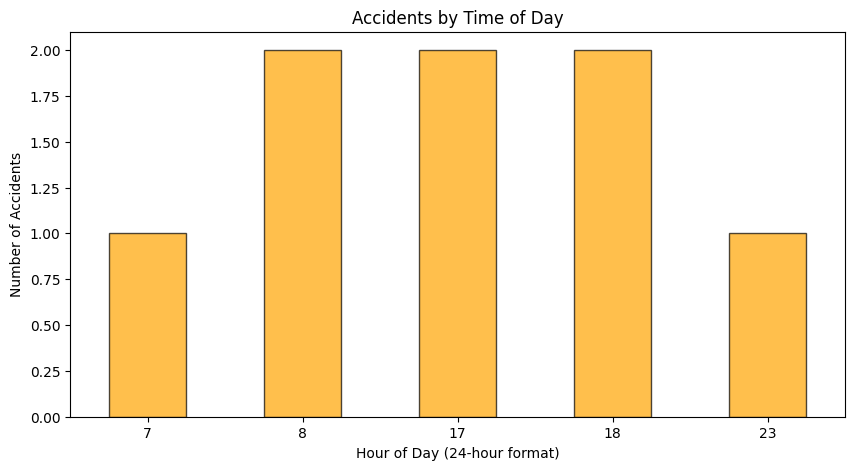

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
data = {
    'Start_Time': [
        '2023-07-01 08:15:00','2023-07-01 08:45:00',
        '2023-07-01 17:20:00','2023-07-02 18:00:00',
        '2023-07-02 23:10:00','2023-07-03 07:40:00',
        '2023-07-03 17:50:00','2023-07-03 18:30:00'
    ]
}
df = pd.DataFrame(data)
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
hourly_counts = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10,5))
hourly_counts.plot(kind='bar', color='orange', alpha=0.7, edgecolor='black')
plt.title("Accidents by Time of Day")
plt.xlabel("Hour of Day (24-hour format)")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.show()


#✅ 2. Interpret Results

Typically, accidents peak during rush hours:

Morning (7 AM – 9 AM) → people commuting to work/school.

Evening (4 PM – 7 PM) → return traffic + tired drivers.

Late night (11 PM – 2 AM) can also show spikes due to fatigue or impaired driving.

#✅3.Group into Day Parts:

#Are accidents more severe during rain or fog?
Is there a correlation between visibility and severity?  

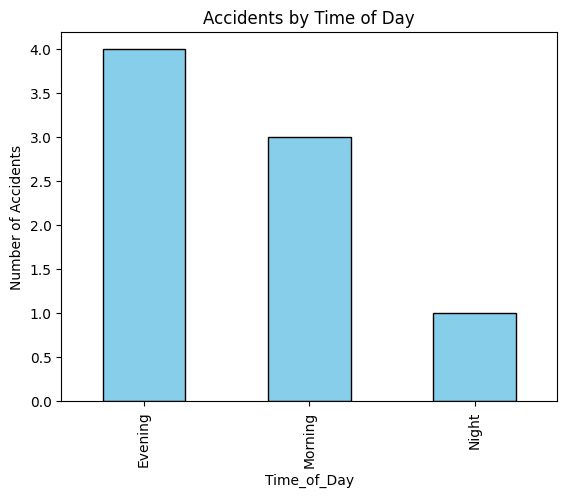

In [16]:
def time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"
df['Time_of_Day'] = df['Hour'].apply(time()
tod_counts = df['Time_of_Day'].value_counts()
tod_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Accidents by Time of Day")
plt.ylabel("Number of Accidents")
plt.show()


#✅ 1. Are accidents more severe during rain or fog?
Approach:

Look at Weather_Condition (Rain, Fog, Clear, etc.).

Compare with Severity (often coded 1–4, or Minor/Moderate/Severe).

Calculate average severity per weather condition.

In [19]:
import pandas as pd
data = {
    'Weather_Condition': ['Clear','Rain','Rain','Fog','Fog','Clear','Rain','Fog','Clear','Rain'],
    'Severity': [2,3,4,2,3,1,4,3,2,4]
}
df = pd.DataFrame(data)
severity_by_weather = df.groupby("Weather_Condition")['Severity'].mean().sort_values(ascending=False)
print(severity_by_weather)


Weather_Condition
Rain     3.750000
Fog      2.666667
Clear    1.666667
Name: Severity, dtype: float64


#✅ 2. Is there a correlation between visibility and severity?
Approach:

Use the Visibility column (in miles or km).

Compute correlation with Severity.

In [18]:

data2 = {
    'Visibility(mi)': [10, 2, 1, 8, 0.5, 3, 7, 2, 1.5, 10],
    'Severity': [1, 3, 4, 2, 4, 3, 2, 3, 4, 1]
}
df2 = pd.DataFrame(data2)


corr = df2['Visibility(mi)'].corr(df2['Severity'])
print("Correlation between visibility and severity:", corr)


Correlation between visibility and severity: -0.967013186992191


#✅ 3. Visualize the Relationship:

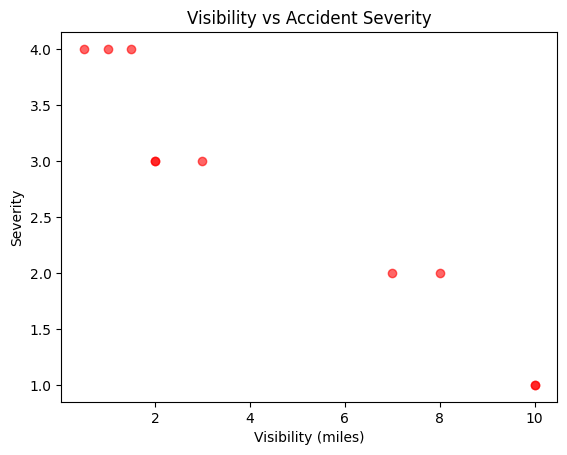

In [20]:
import matplotlib.pyplot as plt

plt.scatter(df2['Visibility(mi)'], df2['Severity'], color='red', alpha=0.6)
plt.title("Visibility vs Accident Severity")
plt.xlabel("Visibility (miles)")
plt.ylabel("Severity")
plt.show()


#Document assumptions, test hypotheses, and summarize indings.

#1. Assumptions:

Dataset includes timestamp, severity, latitude/longitude, weather condition, and visibility.

Severity scale: Higher numbers = more severe (e.g., 1 = Minor, 4 = Severe).

Weather conditions are categorical (e.g., Clear, Rain, Fog, Snow).

Visibility is recorded in miles (or km) and reflects actual road conditions.

Data is assumed to be cleaned of duplicates/missing values before analysis.

#2. Hypotheses:

Time of Day Hypothesis

Most accidents occur during rush hours (7–9 AM, 4–7 PM).

Weather Hypothesis

Rain causes more frequent accidents, but usually less severe.

Fog causes fewer accidents, but more severe due to poor visibility.

Visibility Hypothesis

Lower visibility is negatively correlated with accident severity (as visibility decreases, severity increases).

#4. Summary:

Rush hours are the most accident-prone times, highlighting the need for traffic management and public awareness campaigns.

Rain increases accident frequency, suggesting infrastructure improvements (better drainage, anti-skid surfaces).

Fog increases accident severity, requiring stronger safety measures (speed regulation, fog lights, warning systems).

Visibility is a key factor: policies and driver assistance technologies (adaptive headlights, automated braking) can help reduce severe crashes.